<a href="https://colab.research.google.com/github/binary-ibex/AI-practicals/blob/main/notebooks/Dijkstra_shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dijkstra algorithm 

Dijkstra’s algorithm finds the shortest path from a starting node to a target node in a weighted graph.

Dijkstra’s Shortest Path Algorithm explanation by computer science

https://www.youtube.com/watch?v=pVfj6mxhdMw&feature=youtu.be

Dr Mike Pound explanation of Dijkstra's shortest path. 

https://www.youtube.com/watch?v=GazC3A4OQTE

Let's see how it works 

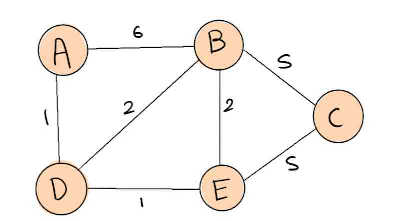

```
Consider the graph given above, here we will find the shortest path from the node A to node C using Dijkstra algorithm.

Initalizition

Visited = []
sorted_list = []
Initalize the nodes distance from node A
A = 0
B = inf
C = inf
D = inf
E = inf
======================================
Current node A

neighbours = B , D

Total distance from node A
B = 6 ...(6<inf)
D = 1 ...(1<inf)

put nodes in sorted list
sorted_list = [(D , 1), (B , 6)]

Add node A to visited list

visited = [A]

pop node D from the sorted list
======================================

Current node D

neighbours = B , E , A

since node A is already visited, we will ignore node A.

Total distance from node A
B = 3 ...(3<6)
E = 2 ...(2<inf)

put nodes in sorted list
sorted_list = [(E , 2), (B , 3)]

Add node D to visited list

visited = [A, D]
pop node E from the sorted list

====================================

Current node E

neighbours = D , B, C

since node D is already visited, we will ignore node D.

Total distance from node A
B = 3 ...(3<4)
C = 7 ...(7<inf)

put nodes in sorted list
sorted_list = [(B , 3), (C , 7)]

Add node E to visited list

visited = [A, D, E]
pop node B from the sorted list

===================================

Current node B

neighbours = A , D, E, C

since node D, A, E is already visited, we will ignore them.

Total distance from node A
C = 7 ...(7<8)


put nodes in sorted list
sorted_list = [(C , 7)]

Add node B to visited list

visited = [A, D, E, B]

pop node C from the sorted list


========================================
Current node C

neighbours = B , E

since node B , E is already visited no node remain to visit from node C, so grapg traversing top here

shortest path from node A to

A = 0
B = 3
C = 7
D = 1
E = 2

Shortest path from node A to node C is

A > D > E > C

path length = 7

```

In [ ]:
def dijkstra(graph, start, end):
    #dictionary for constructing path by storing previous node in it
    backtrack = {}

    #initalizing all node distance from start to infinity
    for node in graph.keys():
        backtrack[node] = [0 if node == start else float('inf'), None]

    #empty path list
    path = []

    #temporary list
    temp = [(start, 0)]

    #keep track of visited node  
    visited = []

    while(temp):
        #poping node at minimum distance from the source in temp list
        N = temp.pop(0)[0]
        if N not in visited:
            visited.append(N)
            for node, distance in graph[N].items():

                #calculating the total cost to reach node
                g = graph[N][node] + backtrack[N][0]
                temp.append((node, g))

                #if we find path with less cost to reach the node, than prevoius one then replace it with new path cost
                if g<backtrack[node][0]:
                    backtrack[node][0] = g
                    backtrack[node][1] = N

                #sorting the temp list according to weight or cost of the path
                temp = list(sorted(temp, key= lambda x:x[1]))

                #if we found the target then generate path and return it
                if node == end:
                    while(end):
                        path = [end] + path
                        end = backtrack[end][1]
                    return path
    #if no path found return None
    return None

#weighted graph implementation
graph = {
    'A' : {'B' : 6, 'D' :1 },
    'B' : {'A' : 6, 'C': 5, 'E' :2, 'D' : 2},
    'C' : {'B' : 5, 'E' : 5},
    'D' : {'A': 1, 'B' : 2, 'E' : 1},
    'E' : {'D' : 1, 'C' : 5}
}

#printing result
print(dijkstra(graph, 'A', 'C'))



['A', 'D', 'E', 'C']
